In [1]:
import pandas as pd
import numpy as np
file1  =DOWNLOAD_DIR+"\\"+"Claim.csv"
file2  =DOWNLOAD_DIR+"\\"+"EPFiGMS.xlsx"
file3  =DOWNLOAD_DIR+"\\"+"dsc.xlsx"
file4  =DOWNLOAD_DIR+"\\"+"esign.xlsx"
file5  =DOWNLOAD_DIR+"\\"+"tin.csv"
file51  =DOWNLOAD_DIR+"\\"+"tout.csv"
file6  =DOWNLOAD_DIR+"\\"+"online.xlsx"
file7  =DOWNLOAD_DIR+"\\"+"primary.xlsx"
file8  =DOWNLOAD_DIR+"\\"+"others.xlsx"
file9  =DOWNLOAD_DIR+"\\"+"Claim_categorized.xlsx"
file10 =DOWNLOAD_DIR+"\\"+"Claim_pending_for_10Days_categorized.xlsx"
file11 =DOWNLOAD_DIR+"\\"+"Pendency_summary_report.xlsx"

def write_xls(df, avg, file):
    writer = pd.ExcelWriter(file, engine='xlsxwriter')
    df.to_excel(writer, sheet_name='Sheet1')
    workbook  = writer.book
    worksheet = writer.sheets['Sheet1']

    start_row = 1
    start_col = 2
    end_row = len(df)
    end_col = len(df.columns)


    format1 = workbook.add_format({'font_color': '#9C0006'})
    format2 = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
    """worksheet.conditional_format(start_row, start_col, end_row, end_col, {'type':     'cell', 
                                                                          'criteria': '>=', 
                                                                          'value':    avg,
                                                                          'format':   format1})"""
    #worksheet7.conditional_format('B1:B1048576', {'type': '3_color_scale'})

    # Or with row, col notation:
    worksheet.conditional_format(start_row, start_col, end_row, end_col, {'type': '3_color_scale',
                                                                          'min_value': 50,
                                                                          'max_value': 500,
                                                                         'min_color': '#ffffff',
                                                                          'max_color': '#ff0000'})
    worksheet.set_column(0, len(df), 15, format2)



    for i, width in enumerate(df.columns):
        if i==2:
            worksheet.set_column(i, i, 20)
        else:
            worksheet.set_column(i, i, 10)

    writer.save()
    writer.close()
    
def process1(x):
    return x#[:8]

def process2(x):
    return x[11:]

def process(x):
    y=str(x)[-3:]
    try:
        return int(y)
    except:
        return 100
    
def filter_and_rename(df,columns, rename_cols):
    df=df[columns]
    df.rename(columns = rename_cols , inplace = True)
    return df

def generate_summary():

    df = pd.read_csv(file1)

    columns=['CLAIM ID','MEMBER ID','CLAIM TYPE','ONLINE/OFFLINE','GROUP ID','TASK ID','PENDING DAYS','STATUS','DEATH CASE']
    rename_cols = {'CLAIM ID':'CLAIMS'}
    df=filter_and_rename(df,columns, rename_cols)
    df1 = pd.pivot_table(df, values='CLAIMS', index=["GROUP ID","TASK ID"], aggfunc=lambda x: len(x))

    df3=pd.read_excel(file2,skiprows=1)
    columns=['Registration Number','Grievance Category','Pending Days','Pending With']
    rename_cols={'Registration Number':'EPFiGMS'}
    df3=filter_and_rename(df3,columns, rename_cols)
    df3['TASK ID'] = [int(x[-5:]) for x in df3['Pending With']]
    df3['GROUP ID'] = [int(str(x)[:3]) for x in df3['TASK ID']]
    df4 = pd.pivot_table(df3, values='EPFiGMS', index=["GROUP ID","TASK ID"], aggfunc=lambda x: len(x))

    df5=pd.read_excel(file4,skiprows=1)
    columns=['ACC TASK ID','EST ID','PENDING DAYS']
    rename_cols={'EST ID':'ESigns','ACC TASK ID':'Pending With'}
    df5=filter_and_rename(df5,columns, rename_cols)
    df5['TASK ID'] = [int(str(x)[-5:]) for x in df5['Pending With']]
    df5['GROUP ID'] = [int(str(x)[:3]) for x in df5['TASK ID']]
    df6= pd.pivot_table(df5, values='ESigns', index=["GROUP ID","TASK ID"], aggfunc=lambda x: len(x))

    df7=pd.read_excel(file3,skiprows=1)
    columns=['ACC TASK ID','EST ID','PENDING DAYS']
    rename_cols={'EST ID':'DSCs','ACC TASK ID':'Pending With'}
    df7=filter_and_rename(df7,columns, rename_cols)
    df7['TASK ID'] = [int(str(x)[-5:]) for x in df7['Pending With']]
    df7['GROUP ID'] = [int(str(x)[:3]) for x in df7['TASK ID']]
    df8= pd.pivot_table(df7, values='DSCs', index=["GROUP ID","TASK ID"], aggfunc=lambda x: len(x))

    df9=pd.read_csv(file5)
    df9['ACC TASK ID']=df9['ACC TASK ID'].astype(float).astype("Int32")
    df9['ACC TASK ID']=df9['ACC TASK ID'].fillna(10100)
    columns=['TRAN CLAIM ID','ACC TASK ID','PENDING DAYS']
    rename_cols={'TRAN CLAIM ID':'TINs','ACC TASK ID':'TASK ID'}
    df9=filter_and_rename(df9,columns, rename_cols)
    df9['GROUP ID'] = [int(str(x)[:3]) for x in df9['TASK ID']]
    df10= pd.pivot_table(df9, values='TINs', index=["GROUP ID","TASK ID"], aggfunc=lambda x: len(x))

    df11=pd.read_excel(file6,skiprows=1)
    columns=['MEMBER ID','PENDING DAYS','A/C GROUP']
    rename_cols={'MEMBER ID':'Basic'}
    df11=filter_and_rename(df11,columns, rename_cols)
    df11['GROUP ID'] = [process(x) for x in df11['A/C GROUP']]
    df11['TASK ID'] = [str(x)+'00-sum' for x in df11['GROUP ID']]
    df12= pd.pivot_table(df11, values='Basic', index=["GROUP ID","TASK ID"], aggfunc=lambda x: len(x))

    df13=pd.read_excel(file7,skiprows=1)
    columns=['MEMBER ID','PENDING DAYS','A/C GROUP']
    rename_cols={'MEMBER ID':'Primary'}
    df13=filter_and_rename(df13,columns, rename_cols)
    df13['GROUP ID'] = [process(x) for x in df13['A/C GROUP']]
    df13['TASK ID'] = [str(x)+'00-sum' for x in df13['GROUP ID']]
    df14= pd.pivot_table(df13, values='Primary', index=["GROUP ID","TASK ID"], aggfunc=lambda x: len(x))

    df15=pd.read_excel(file8,skiprows=1)
    columns=['MEMBER ID','PENDING DAYS','A/C GROUP']
    rename_cols={'MEMBER ID':'Others'}
    df15=filter_and_rename(df15,columns, rename_cols)
    df15['GROUP ID'] = [process(x) for x in df15['A/C GROUP']]
    df15['TASK ID'] = [str(x)+'00-sum' for x in df15['GROUP ID']]
    df16= pd.pivot_table(df15, values='Others', index=["GROUP ID","TASK ID"], aggfunc=lambda x: len(x))

    dfd=df[df['DEATH CASE'] == 'DEATH CASE']
    dfd.rename(columns = {'CLAIMS':'DEATH_CLAIMS'}, inplace = True)
    df17 = pd.pivot_table(dfd, values='DEATH_CLAIMS', index=["GROUP ID","TASK ID"], aggfunc=lambda x: len(x))

    for idx, row in df17.iterrows():
        df1.at[idx,'DEATH_CLAIMS'] = df17['DEATH_CLAIMS'][idx]

    for idx, row in df4.iterrows():
        df1.at[idx,'EPFiGMS'] = df4['EPFiGMS'][idx]

    for idx, row in df6.iterrows():
        df1.at[idx,'ESigns'] = df6['ESigns'][idx]

    for idx, row in df8.iterrows():
        df1.at[idx,'DSCs'] = df8['DSCs'][idx]

    for idx, row in df10.iterrows():
        df1.at[idx,'TINs'] = df10['TINs'][idx]

    for idx, row in df12.iterrows():
        df1.at[idx,'Basic'] = df12['Basic'][idx]

    for idx, row in df14.iterrows():
        df1.at[idx,'Primary'] = df14['Primary'][idx]

    for idx, row in df16.iterrows():
        df1.at[idx,'Others'] = df16['Others'][idx]

    df1.sort_index(inplace=True)
    df1 = df1.fillna(' ') #0)
    dfs = [(df,'CLAIMS'),
           (df3,'EPFiGMS'),
           (df5,'ESigns'),
           (df7,'DSCs'),
           (df9,'TINs'),
           (df11,'Basic'),
           (df13,'Primary'),
           (df15,'Others')]

    """
    for _df, col in dfs:
        dfx = pd.pivot_table(_df, values=col, index=["GROUP ID"], aggfunc=lambda x: len(x))
        for idx, row in dfx.iterrows():
            y =(idx,str(idx)+'00-sum')
            df1.at[y,col] = dfx[col][idx]

    df1.sort_index(inplace=True)
    """        

    df1.sort_index(inplace=True)
    df1.fillna(' ')
    write_xls(df1,100, file11)

    
generate_summary()

df = pd.read_csv(file1)
df['type'] = df['CLAIM TYPE'].apply(process1)
df=df[['CLAIM ID','MEMBER ID','type','GROUP ID','TASK ID','PENDING DAYS','STATUS','DEATH CASE']]
df['pendingat'] = df['STATUS'].apply(process2)
df1 = pd.pivot_table(df, values=['CLAIM ID'],columns=['type'], index=["GROUP ID","TASK ID",'pendingat'],margins=False, aggfunc=lambda x: len(x))
df1.rename(columns = rename_claim, inplace = True)
df1 = df1.fillna(' ')

write_xls(df1,100, file9)

df2=df[df['PENDING DAYS'] > 10]
df3 = pd.pivot_table(df2, values=['CLAIM ID'],columns=['type'], index=["GROUP ID","TASK ID"],margins=False, aggfunc=lambda x: len(x))
df3.rename(columns = rename_claim, inplace = True)
df3 = df3.fillna(' ')
write_xls(df3,30, file10)

In [5]:
!pip install tensorflow matplotlib

     |████████████████████████████████| 9.2 MB 4.3 MB/s eta 0:00:01     |████████▏                       | 2.4 MB 4.3 MB/s eta 0:00:02
     |████████████████████████████████| 104 kB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 20.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 16.5 MB/s eta 0:00:01


7/7 [==============================] - 0s 824us/step


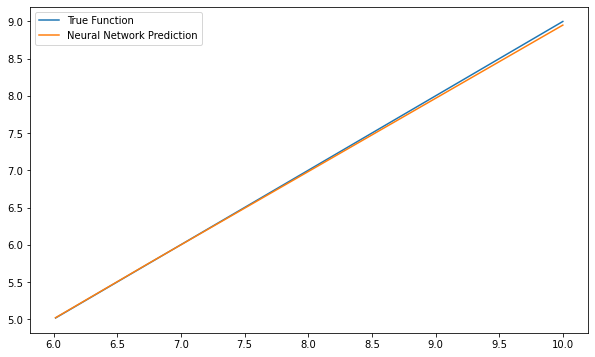

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

# Generate sample data for piecewise linear function
def piecewise_linear(x):
    return np.piecewise(x, [x < 0, x >= 0], [lambda x: x + 1, lambda x: x - 1])

x = np.linspace(-10, 10, 1000)
y = piecewise_linear(x)

# Split the data into training and testing sets
x_train, x_test = x[:800], x[800:]
y_train, y_test = y[:800], y[800:]

# Build the neural network model
model = Sequential([
    Dense(10, input_dim=1, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

# Predict using the model
y_pred = model.predict(x_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='True Function')
plt.plot(x_test, y_pred, label='Neural Network Prediction')
plt.legend()
plt.show()
